In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
#plt.style.use("seaborn-whitegrid")
import matplotlib.pyplot as plt
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df_watson.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# 1. Load and Check Data

In [7]:
df_watson = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [8]:
df_watson.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [9]:
df_watson.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
df_watson.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
df_watson.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [12]:
df_watson.shape

(9134, 24)

# 2. Data Understanding

In [13]:
# Remove Customer ID from data set.
df_watson=df_watson.drop(columns=['Customer'])

There are many details in the data set provided: :

There are 9134 Observations of 24 Variable
There are mix of categorical and continous DataType.
Dependent Variable is Customer Life Time Value as we have to predict the CLV.
Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TotalClaimAmount
Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage, Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus, MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType, SalesChannel, TotalClaimAmountVehicleClass, VehicleSize
There is no null value. So we will not assign or drop any value. 
The "customer" column is the serial number, so it is unimportant for analysis and is removed from the data set.

In [14]:
# Checking null values in each column and storing the value in a data frame na_counts
total = df_watson.isnull().sum().sort_values(ascending=False)
percent_1 = df_watson.isnull().sum()/df_watson.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(24)

,Total,%
Vehicle Size,0,0.0
Marital Status,0,0.0
Customer Lifetime Value,0,0.0
Response,0,0.0
Coverage,0,0.0
Education,0,0.0
Effective To Date,0,0.0
EmploymentStatus,0,0.0
Gender,0,0.0
Income,0,0.0


### There are no null values, so no further action required to replace missing or null values.

In [15]:
print(df_watson.apply(lambda col: col.unique()))

State                            [Washington, Arizona, Nevada, California, Oregon]
Customer Lifetime Value          [2763.519279, 6979.535903, 12887.43165, 7645.8...
Response                                                                 [No, Yes]
Coverage                                                [Basic, Extended, Premium]
Education                        [Bachelor, College, Master, High School or Bel...
Effective To Date                [2/24/11, 1/31/11, 2/19/11, 1/20/11, 2/3/11, 1...
EmploymentStatus                 [Employed, Unemployed, Medical Leave, Disabled...
Gender                                                                      [F, M]
Income                           [56274, 0, 48767, 43836, 62902, 55350, 14072, ...
Location Code                                             [Suburban, Rural, Urban]
Marital Status                                         [Married, Single, Divorced]
Monthly Premium Auto             [69, 94, 108, 106, 73, 67, 101, 71, 93, 110, 7...
Mont

In [16]:
# Unique Values of each column
df_watson.astype('object').describe(include='all').loc['unique', :]

State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
Name: unique, dtype: object

# 3. Exploratory Data Analysis (EDA)

### In this section we perform initial investigations on insurance data so as to discover patterns and to check assumptions with the help of summary statistics and graphical representations

In [17]:
df_watson['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [18]:
# importing statistics module 
from statistics import variance 

In [19]:
variance(df_watson['Customer Lifetime Value'])

47210195.87509026

In [20]:
df_watson['Customer Lifetime Value'].skew()

3.032280259929985

In [21]:
df_watson['Customer Lifetime Value'].kurtosis()

13.823533425442404

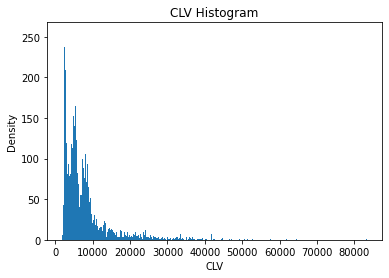

In [22]:
bin_amount1 = (max(df_watson['Customer Lifetime Value']) - min(df_watson['Customer Lifetime Value'])) / 100
plt.hist(df_watson['Customer Lifetime Value'], bins=int(round(bin_amount1)))
plt.xlabel('CLV')
plt.ylabel('Density')
plt.title('CLV Histogram')
plt.show()

## Maximum CLV is  83325.381andtheminimumCLVis 1898.008.
## Mean of CLV is  8005andtheMedianis 5780.
## The Variance in CLV is 47210196 and the Standard Deviation is 6870.968.
## Skewness is 4.031284. CLV is positive skewed and most values are concentrated on the left of
## the mean value, yet all the extreme values are on the right of the mean value.
## Kurtosis is 13.81163. Since kurtosis > 3, means distribution has thicker tails than normal
## distribution and have more outliers (extreme values).
## This means that the distribution of CLV is positively skewed (as expected) and is heavily
## Leptokurtic.
## These results indicate a distribution that is heavily skewed with a very large tail.
## There are a LOT of Customers with low CLV. Very few customers with high CLV.
## This can be visually understood using the Histogram.

# 3.2. Descriptive Analysis of Monthly Premium Auto(MPA)

In [23]:
df_watson['Monthly Premium Auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [24]:
variance(df_watson['Monthly Premium Auto'])

1183.908218657927

In [25]:
df_watson['Monthly Premium Auto'].skew()

2.1235464499475345

In [26]:
df_watson['Monthly Premium Auto'].kurtosis()

6.193604965840608

In [27]:
df_watson['Monthly Premium Auto'].corr(df_watson['Customer Lifetime Value'])

0.3962617375340208

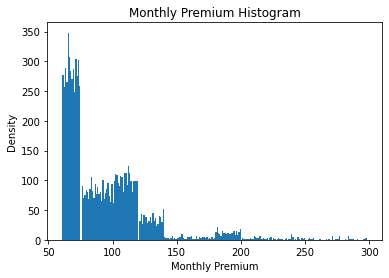

In [28]:
bin_amount2 = (max(df_watson['Monthly Premium Auto']) - min(df_watson['Monthly Premium Auto'])) / 1
plt.hist(df_watson['Monthly Premium Auto'], bins=int(round(bin_amount2)))
plt.xlabel('Monthly Premium')
plt.ylabel('Density')
plt.title('Monthly Premium Histogram')
plt.show()

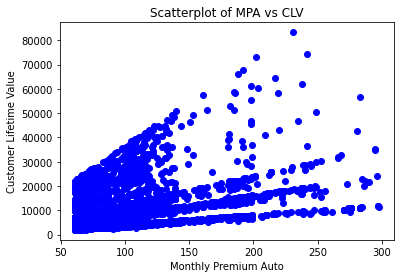

In [29]:
plt.plot(df_watson['Monthly Premium Auto'], df_watson['Customer Lifetime Value'], 'bo')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.title('Scatterplot of MPA vs CLV')
plt.show()

## Maximum MPA is 298 and the minimum MPA is 61
## Mean of MPA is 93.21929 and the Median is 84.00
## The Variance in MPA is 1183.908 and the Standard Deviation is 34.40797
## Skewness is 2.122849. MPA is positive skewed and most values are concentrated on the left of
## the mean value, yet all the extreme values are on the right of the mean value.
## Kurtosis is 6.187546. Since kurtosis > 3, means distribution has thicker tails than normal
## distribution and have more outliers (extreme values).
## There is a Positive Corelation of 39.62 % of MPA with CLV. From scatter plot, it is clearly
## visible that on MPA, CLV is also Increasing.7.
## Monthly premiums follow a trend similar to CLV although the distribution is NOT as skewed
## or as long tailed as CLV. This can be visually seen in the Histogram.

# 3.3. Descriptive Analysis ofTotalClaimAmount (TCA)

In [30]:
df_watson['Total Claim Amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

In [31]:
variance(df_watson['Total Claim Amount'])

84390.30333761733

In [32]:
df_watson['Total Claim Amount'].skew()

1.7149658097209557

In [33]:
df_watson['Total Claim Amount'].kurtosis()

5.979401045843762

In [34]:
df_watson['Total Claim Amount'].corr(df_watson['Customer Lifetime Value'])

0.22645091528641711

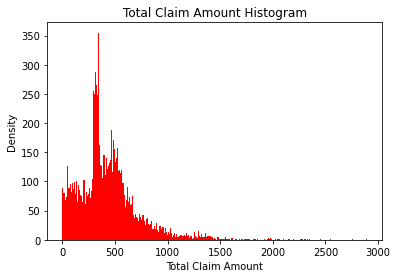

In [35]:
bin_amount3 = (max(df_watson['Total Claim Amount']) - min(df_watson['Total Claim Amount'])) / 10
plt.hist(df_watson['Total Claim Amount'], bins=int(round(bin_amount3)),color='red')
plt.xlabel('Total Claim Amount')
plt.ylabel('Density')
plt.title('Total Claim Amount Histogram')
plt.show()

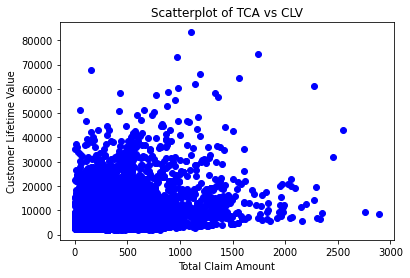

In [36]:
plt.plot(df_watson['Total Claim Amount'], df_watson['Customer Lifetime Value'], 'bo')
plt.xlabel('Total Claim Amount')
plt.ylabel('Customer Lifetime Value')
plt.title('Scatterplot of TCA vs CLV')
plt.show()

## Maximum TCA is  0.099007andtheminimumTCAis 2893.239678
## Mean of TCA is  434.0888andtheMedianis 383.945
## The Variance in TCA is 84390.3 and the Standard Deviation is 290.5001
## Skewness is 1.714403. TCA is positive skewed and most values are concentrated on the left of
## the mean value, yet all the extreme values are on the right of the mean value.
## Kurtosis is 5.973506. Since kurtosis > 3, means TCA distribution has thicker tails than normal
## distribution and have more outliers (extreme values).
## There is a Positive Corelation of 22.65 % of TCA with CLV. From scatter plot, it is clearly
## visible that on TCA, CLV is also Increasing.
## Total Claim amounts also follow a trend similar to CLV and MPA although the distribution is
## NOT as skewed or as long tailed as MPA. This can be visually seen in the Histogram.

# This means that variation in data is CLV > MPA > TCA

# 3.4 Descriptive Analysis of other variables:

In [37]:
df_watson['Income'].corr(df_watson['Customer Lifetime Value'])

0.024365660747409073

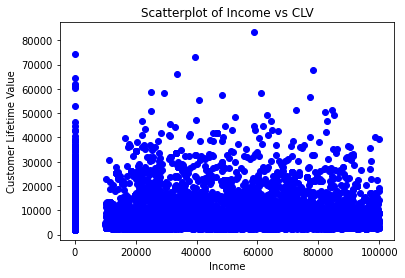

In [38]:
plt.plot(df_watson['Income'], df_watson['Customer Lifetime Value'], 'bo')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.title('Scatterplot of Income vs CLV')
plt.show()

In [39]:
df_watson['Months Since Last Claim'].corr(df_watson['Customer Lifetime Value'])

0.011516681893212052

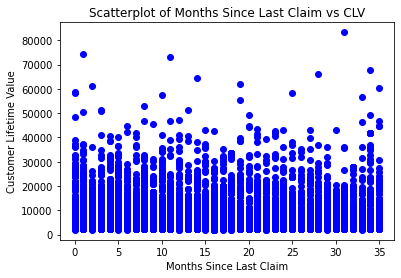

In [40]:
plt.plot(df_watson['Months Since Last Claim'], df_watson['Customer Lifetime Value'], 'bo')
plt.xlabel('Months Since Last Claim')
plt.ylabel('Customer Lifetime Value')
plt.title('Scatterplot of Months Since Last Claim vs CLV')
plt.show()

In [41]:
df_watson['Months Since Policy Inception'].corr(df_watson['Customer Lifetime Value'])

0.009418381244490749

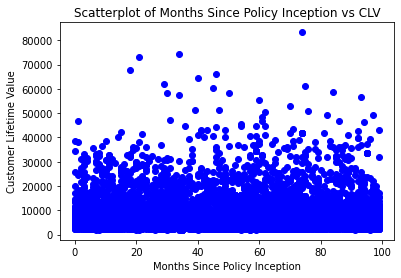

In [42]:
plt.plot(df_watson['Months Since Policy Inception'], df_watson['Customer Lifetime Value'], 'bo')
plt.xlabel('Months Since Policy Inception')
plt.ylabel('Customer Lifetime Value')
plt.title('Scatterplot of Months Since Policy Inception vs CLV')
plt.show()

In [43]:
df_watson['Number of Open Complaints'].corr(df_watson['Customer Lifetime Value'])

-0.03634319326367521

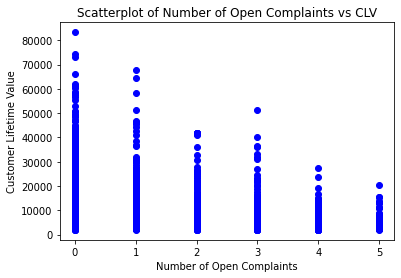

In [44]:
plt.plot(df_watson['Number of Open Complaints'], df_watson['Customer Lifetime Value'], 'bo')
plt.xlabel('Number of Open Complaints')
plt.ylabel('Customer Lifetime Value')
plt.title('Scatterplot of Number of Open Complaints vs CLV')
plt.show()

In [45]:
df_watson['Number of Policies'].corr(df_watson['Customer Lifetime Value'])

0.021955364499626723

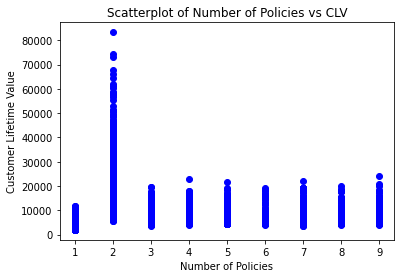

In [46]:
plt.plot(df_watson['Number of Policies'], df_watson['Customer Lifetime Value'], 'bo')
plt.xlabel('Number of Policies')
plt.ylabel('Customer Lifetime Value')
plt.title('Scatterplot of Number of Policies vs CLV')
plt.show()

### The positive correlation values close to zero show that that there is no strong relationship of Income, MonthsSinceLastClaim, NumberofPolicies etc with CLV.

# 4. Inferential Statistics
The most obvious candidate for Dependent Variable is CLV (CustomerLifetimeValue). This also makes sense from a Business Perspective as we want to understand what contributes to making a high value customer (Descriptive analysis) and maybe later on predict who is going to be high value customer (Predictive analysis)

# 4.01 Effect of Insurance Coverage on Customer Life Time Value (CLV)

In [47]:
import seaborn as sns
import matplotlib.ticker as mticker

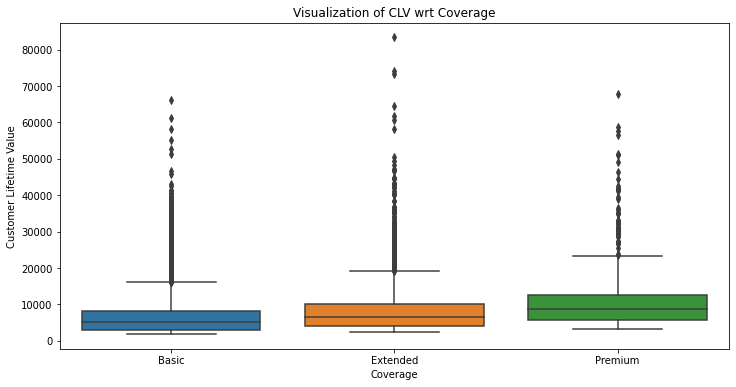

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Coverage', data = df_watson)
plt.xlabel('Coverage')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Coverage')
plt.show()

In [49]:
df_agg = df_watson.groupby('Coverage', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Coverage,Customer Lifetime Value
0,Basic,4.003785e+07
1,Extended,2.410130e+07
2,Premium,8.977977e+06


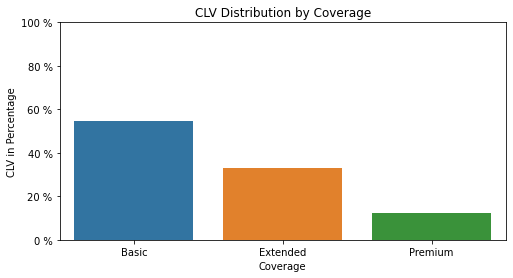

In [53]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='Coverage', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Coverage')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Coverage')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

# 4.02 Effect of Education on Customer Life Time Value (CLV)

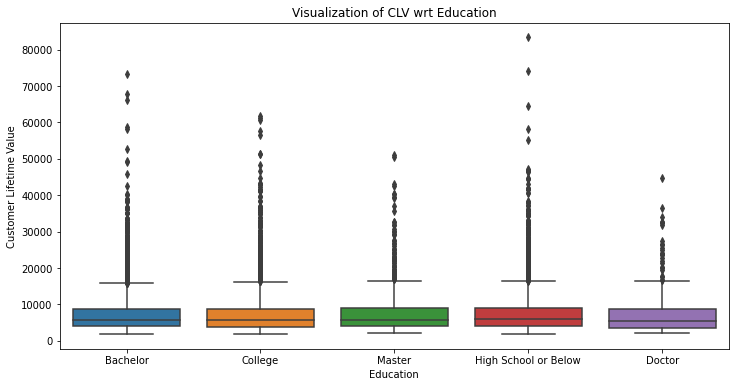

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Education', data = df_watson)
plt.xlabel('Education')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Education')
plt.show()

In [56]:
df_agg = df_watson.groupby('Education', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Education,Customer Lifetime Value
0,Bachelor,2.163407e+07
1,College,2.104870e+07
2,Doctor,2.571958e+06
3,High School or Below,2.175397e+07
4,Master,6.108422e+06


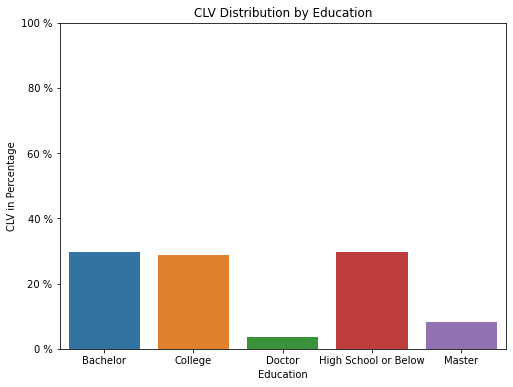

In [57]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(8,6))
sns.barplot(x='Education', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Education')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Education')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Educated customers (with a bachelors or equivalent degree) are more valuable than others.

# 4.03 Effect of Employment Status on Customer Life Time Value (CLV)

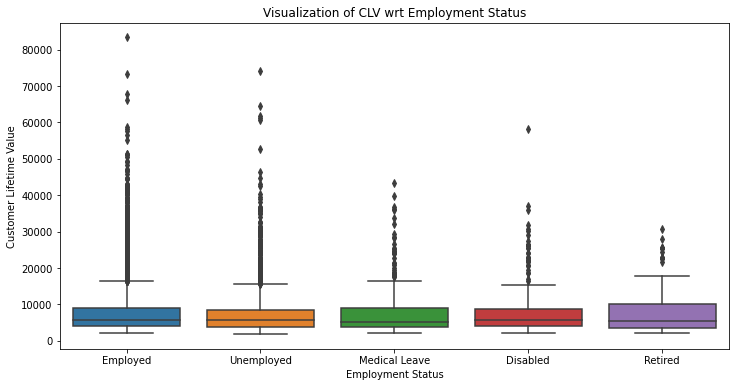

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'EmploymentStatus', data = df_watson)
plt.xlabel('Employment Status')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Employment Status')
plt.show()

In [59]:
df_agg = df_watson.groupby('EmploymentStatus', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,EmploymentStatus,Customer Lifetime Value
0,Disabled,3.178395e+06
1,Employed,4.683253e+07
2,Medical Leave,3.301267e+06
3,Retired,2.111578e+06
4,Unemployed,1.769335e+07


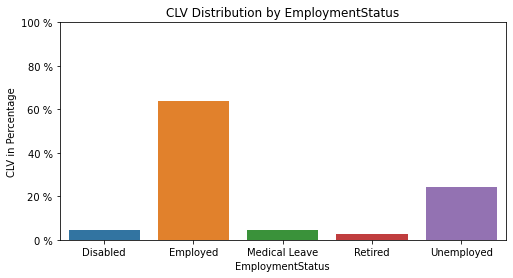

In [61]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='EmploymentStatus', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('EmploymentStatus')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by EmploymentStatus')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Employed customers are more valuable than others as compared to Retired, Unemployed or Disabled Customers.

# 4.04 Effect of Gender on Customer Life Time Value (CLV)

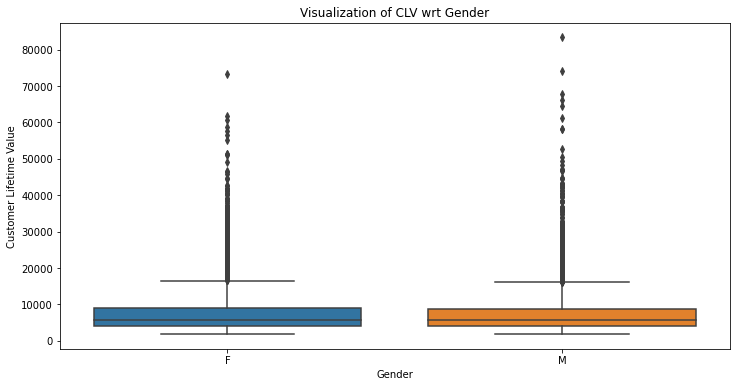

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Gender', data = df_watson)
plt.xlabel('Gender')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Gender')
plt.show()

In [54]:
df_agg = df_watson.groupby('Gender', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Gender,Customer Lifetime Value
0,F,3.771397e+07
1,M,3.540315e+07


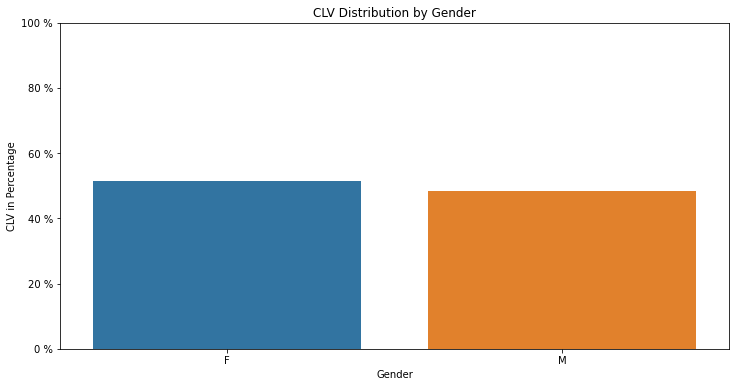

In [55]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Gender', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Gender')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Gender')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Gender has no role to play in determining the value of a customer. Both Male and Female looks valuable.

# 4.05 Effect of Location on Customer Life Time Value (CLV)

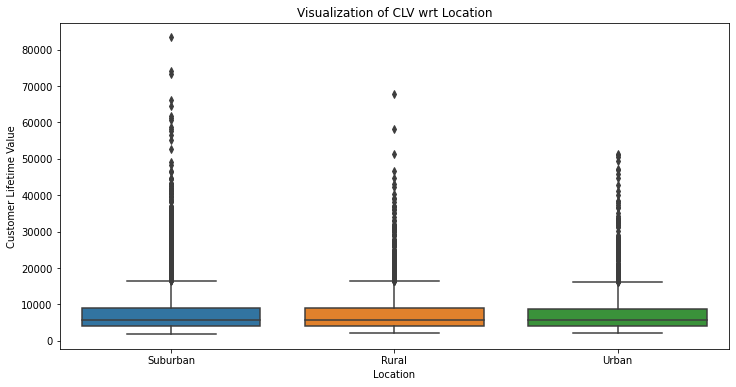

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Location Code', data = df_watson)
plt.xlabel('Location')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Location')
plt.show()

In [63]:
df_agg = df_watson.groupby('Location Code', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Location Code,Customer Lifetime Value
0,Rural,1.410191e+07
1,Suburban,4.625776e+07
2,Urban,1.275746e+07


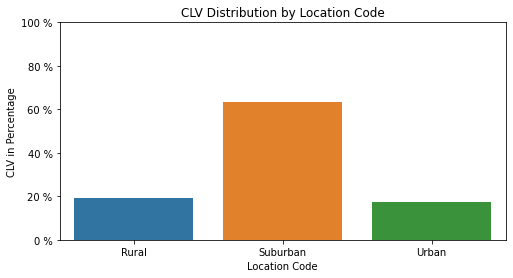

In [65]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='Location Code', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Location Code')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Location Code')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Rural customers are LESS valuable than Urban customers.

# 4.06 Effect of Marital Status on Customer Life Time Value (CLV)

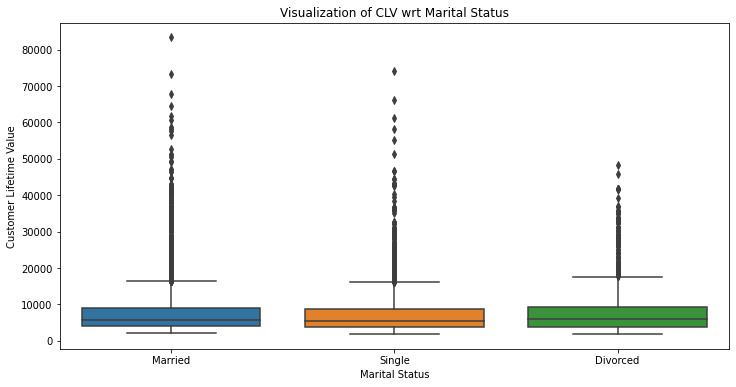

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Marital Status', data = df_watson)
plt.xlabel('Marital Status')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Marital Status')
plt.show()

In [67]:
df_agg = df_watson.groupby('Marital Status', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Marital Status,Customer Lifetime Value
0,Divorced,1.128226e+07
1,Married,4.280237e+07
2,Single,1.903250e+07


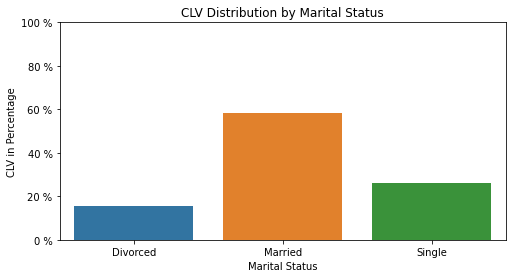

In [69]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='Marital Status', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Marital Status')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Marital Status')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Married customers are buying more auto insurance and adding more value to company.

# 4.07 Effect of Policy Type on Customer Life Time Value (CLV)

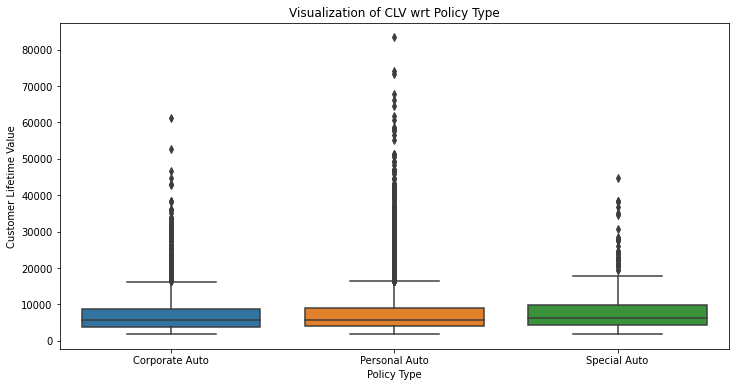

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Policy Type', data = df_watson)
plt.xlabel('Policy Type')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Policy Type')
plt.show()

In [71]:
df_agg = df_watson.groupby('Policy Type', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Policy Type,Customer Lifetime Value
0,Corporate Auto,1.537876e+07
1,Personal Auto,5.448974e+07
2,Special Auto,3.248625e+06


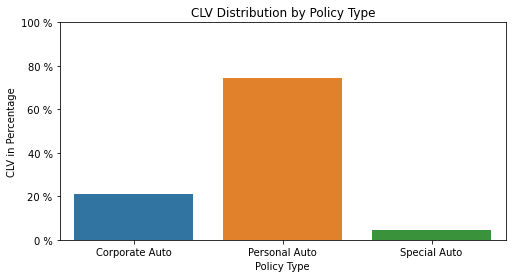

In [73]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='Policy Type', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Policy Type')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Policy Type')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Customers having thier own Persoanl Policy are more valuable to company then Corporate and Special Insurance policy holder.

# 4.08 Effect of Renew Offer Type on Customer Life Time Value (CLV)

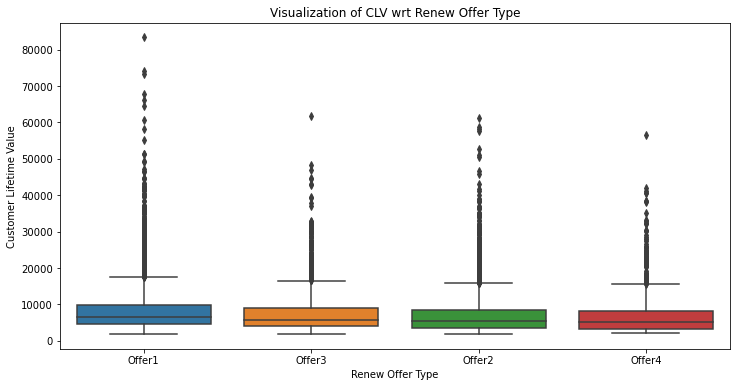

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Renew Offer Type', data = df_watson)
plt.xlabel('Renew Offer Type')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Renew Offer Type')
plt.show()

In [66]:
df_agg = df_watson.groupby('Renew Offer Type', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Renew Offer Type,Customer Lifetime Value
0,Offer1,3.266899e+07
1,Offer2,2.164290e+07
2,Offer3,1.145297e+07
3,Offer4,7.352266e+06


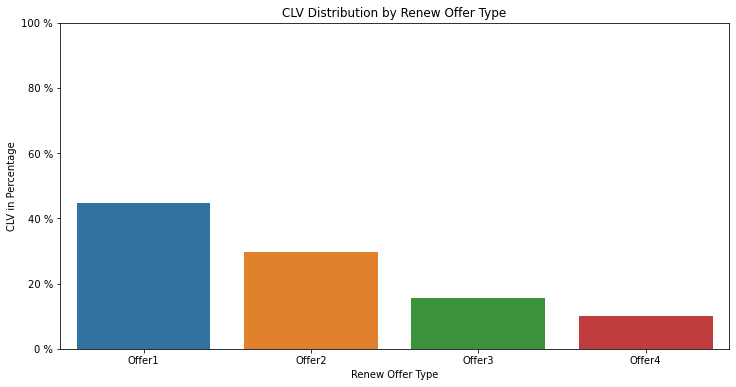

In [67]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Renew Offer Type', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Renew Offer Type')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Renew Offer Type')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Offers 1 and Offer 2 attracts more customers.**

# 4.09 Effect of Sales Channel on Customer Life Time Value (CLV)

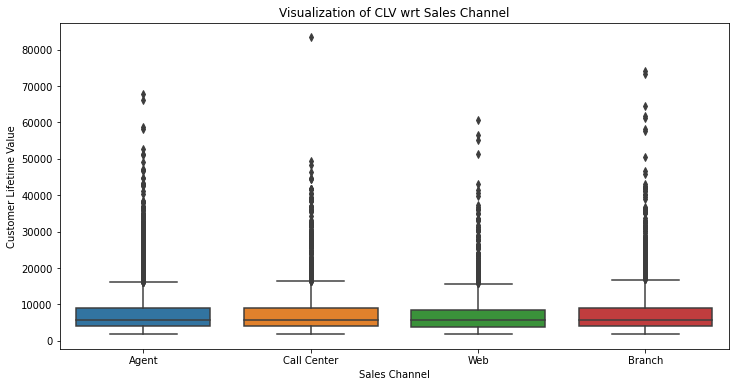

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Sales Channel', data = df_watson)
plt.xlabel('Sales Channel')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Sales Channel')
plt.show()

In [75]:
df_agg = df_watson.groupby('Sales Channel', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Sales Channel,Customer Lifetime Value
0,Agent,2.766896e+07
1,Branch,2.084330e+07
2,Call Center,1.429665e+07
3,Web,1.030822e+07


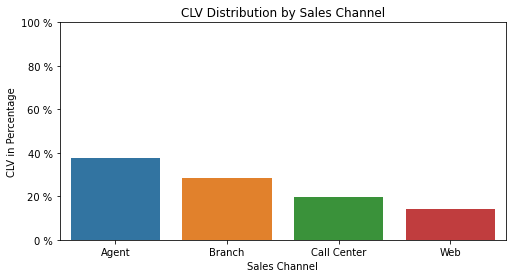

In [77]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='Sales Channel', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Sales Channel')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Sales Channel')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Call Center is not performing well comparerd to other channels throughout the country (in terms of high value customers)

# 4.10 Effect of Vehicle Class on Customer Life Time Value (CLV)

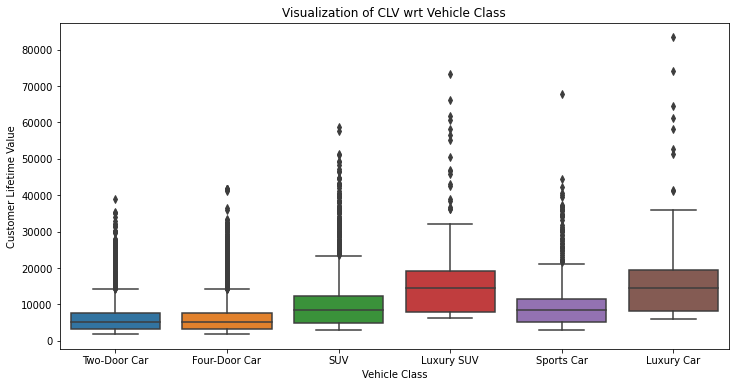

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Vehicle Class', data = df_watson)
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Vehicle Class')
plt.show()

In [79]:
df_agg = df_watson.groupby('Vehicle Class', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Vehicle Class,Customer Lifetime Value
0,Four-Door Car,3.064521e+07
1,Luxury Car,2.779696e+06
2,Luxury SUV,3.150632e+06
3,SUV,1.875655e+07
4,Sports Car,5.203479e+06
5,Two-Door Car,1.258156e+07


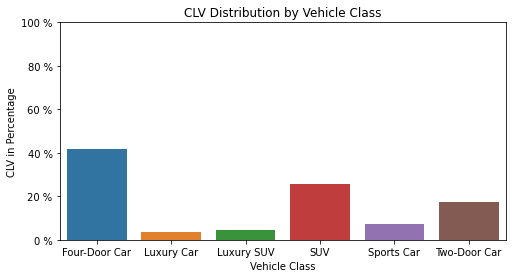

In [81]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum
df_agg['Customer Lifetime Value'][5] = 100 * agg_arr[5] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='Vehicle Class', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Vehicle Class')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Vehicle Class')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Customers having Four-Door car and SUV are more valuable.

# 4.11 Effect of Vehicle Size on Customer Life Time Value (CLV)

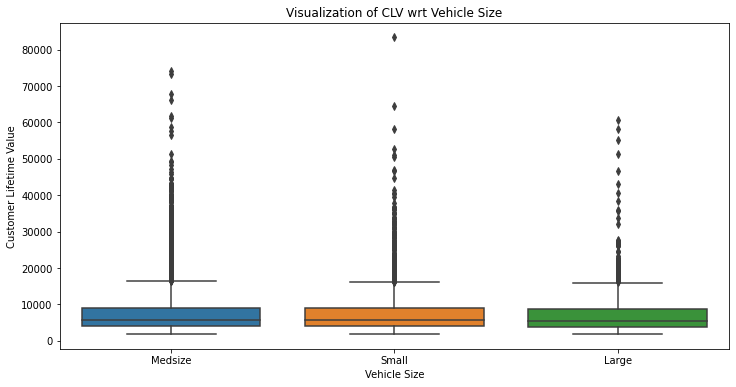

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Vehicle Size', data = df_watson)
plt.xlabel('Vehicle Size')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Vehicle Size')
plt.show()

In [83]:
df_agg = df_watson.groupby('Vehicle Size', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Vehicle Size,Customer Lifetime Value
0,Large,7.137566e+06
1,Medsize,5.171745e+07
2,Small,1.426211e+07


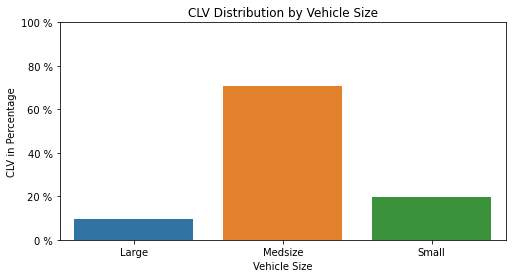

In [85]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(8,4))
sns.barplot(x='Vehicle Size', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Vehicle Size')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Vehicle Size')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Customers having Mid Size vehicals are adding more value to Insurance company.

# 4.12 Effect of States on Customer Life Time Value (CLV)

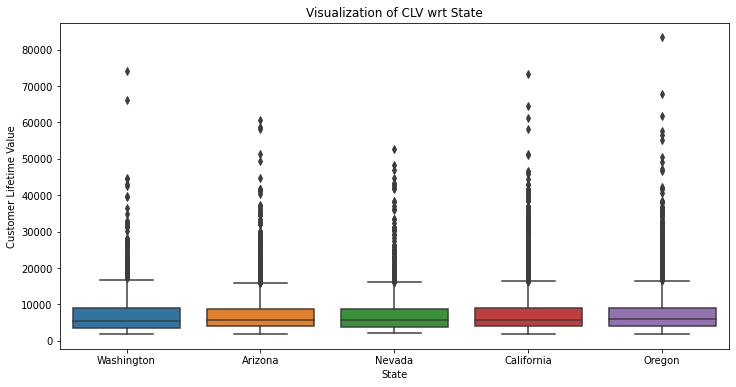

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'State', data = df_watson)
plt.xlabel('State')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt State')
plt.show()

In [87]:
df_agg = df_watson.groupby('State', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,State,Customer Lifetime Value
0,Arizona,1.338786e+07
1,California,2.521149e+07
2,Nevada,7.106015e+06
3,Oregon,2.101062e+07
4,Washington,6.401135e+06


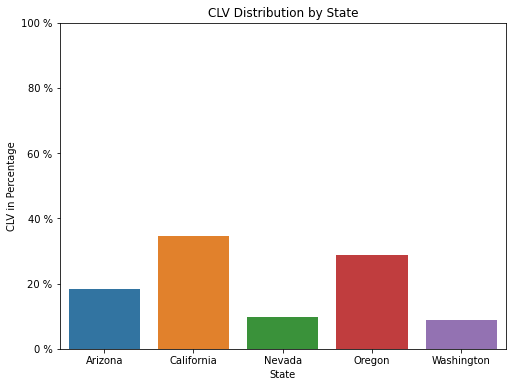

In [89]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(8,6))
sns.barplot(x='State', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('State')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by State')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### California customers are more valuable.

# 4.13 Effect of Policy on Customer Life Time Value (CLV)

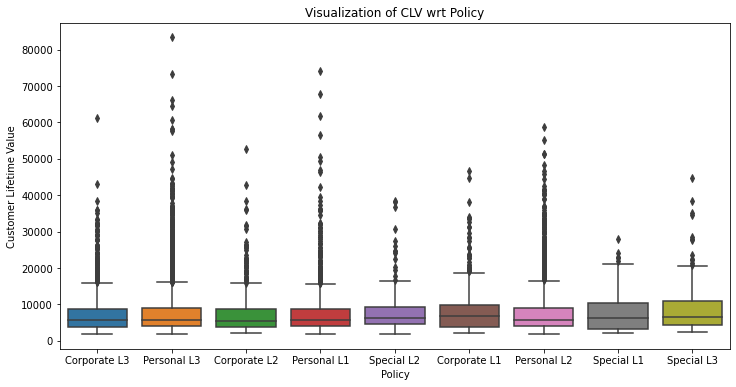

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Policy', data = df_watson)
plt.xlabel('Policy')
plt.ylabel('Customer Lifetime Value')
plt.title('Visualization of CLV wrt Policy')
plt.show()

In [81]:
df_agg = df_watson.groupby('Policy', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Policy,Customer Lifetime Value
0,Corporate L1,3.042499e+06
1,Corporate L2,4.520629e+06
2,Corporate L3,7.815630e+06
3,Personal L1,9.907305e+06
4,Personal L2,1.709252e+07
5,Personal L3,2.748992e+07
6,Special L1,5.499624e+05
7,Special L2,1.365613e+06
8,Special L3,1.333050e+06


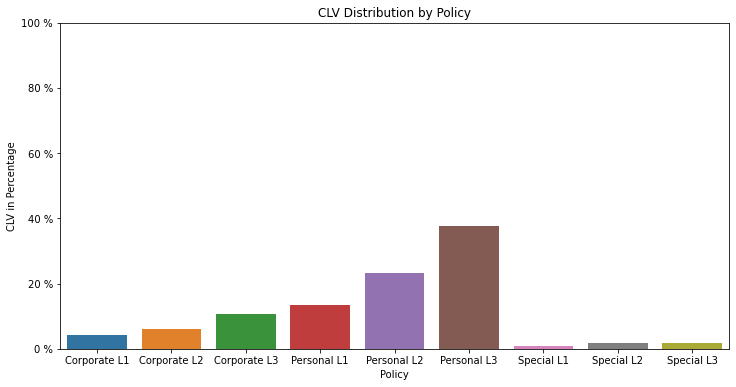

In [82]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum
df_agg['Customer Lifetime Value'][5] = 100 * agg_arr[5] / agg_arr_sum
df_agg['Customer Lifetime Value'][6] = 100 * agg_arr[6] / agg_arr_sum
df_agg['Customer Lifetime Value'][7] = 100 * agg_arr[7] / agg_arr_sum
df_agg['Customer Lifetime Value'][8] = 100 * agg_arr[8] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Policy', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Policy')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Policy')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

### Personal L3 Policy is adding more value to company.

# 5. Regression Analysis with Continuous Variables

In [83]:
df =df_watson.copy()

In [84]:
df.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

Although months since policy inception, months since last claim, number of open complaints and number of policies are all numerical we will consider them as categorical features while preparing the model because numerical values are not high.

Firstly, according to our EDA, we saw that the number of policies >= 3 have similar trend so we will group all of them as 3

In [85]:
df_clv = pd.get_dummies(df,columns=['Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

Get dummies of chosen categorical variables

In [86]:
df_clv

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,...,Number of Policies_8,Number of Policies_9,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2763.519279,56274,69,32,5,0,384.811147,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6979.535903,0,94,13,42,0,1131.464935,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,12887.431650,48767,108,18,38,0,566.472247,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,7645.861827,0,106,18,65,0,529.881344,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2813.692575,43836,73,12,44,0,138.130879,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,198.234764,1,0,1,...,0,0,0,0,0,0,1,0,0,0
9130,3096.511217,21604,79,14,28,0,379.200000,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9131,8163.890428,0,85,9,37,3,790.784983,0,1,1,...,0,0,0,0,0,0,0,0,0,1
9132,7524.442436,21941,96,34,3,0,691.200000,1,0,0,...,0,0,1,0,0,0,1,0,0,0


# Continuous Variables

### Check continious variables and relations of them with categorical variables to see if there is any possibility to create new categorical variables from continuous ones.

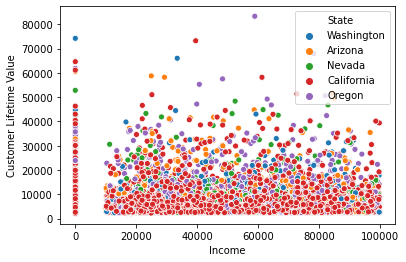

In [87]:
ax = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="State",
                     data=df_watson)

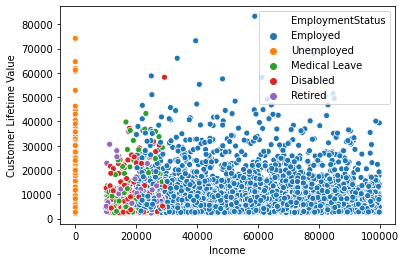

In [88]:
maritalstts = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="EmploymentStatus",
                     data=df_watson)

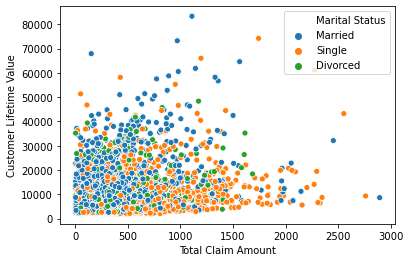

In [89]:
ax = sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", hue="Marital Status",
                     data=df_watson)

In [90]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import json
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# MODEL 1

There is no obvious pattern to create new categorical variable from continious variables. So far, I have explored the dataset in detail and got familiar with it. Now it is time to create the model and see if I can predict Customer Life Time Value.

In [91]:
import statsmodels.api as sm

y = df_clv['Customer Lifetime Value']
x = df_clv.drop('Customer Lifetime Value',axis=1)


x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.635
Model:                                 OLS   Adj. R-squared:                  0.634
Method:                      Least Squares   F-statistic:                     660.6
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:25:51   Log-Likelihood:                -89055.
No. Observations:                     9134   AIC:                         1.782e+05
Df Residuals:                         9109   BIC:                         1.783e+05
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4543.9026    293.384    -15.488      0.000   -5119.000   -3968.805
Income                            -0.0002      0.003     -0.088      0.930      -0.005       0.005
Monthly Premium Auto              81.0850      1.738     46.641      0.000      77.677      84.493
Months Since Last Claim            6.5043      4.328      1.503      0.133      -1.980      14.989
Months Since Policy Inception      1.5650      1.563      1.001      0.317      -1.498       4.629
Number of Open Complaints       -171.4796     47.829     -3.585      0.000    -265.236     -77.724
Total Claim Amount                -0.1922      0.226     -0.852      0.394      -0.635       0.250
Marital Status_Married            33.9548    127.290      0.267      0.790    -215.562     283.472
Marital Status_Single           -208.8929    148.459     -1.407      0.159    -499.906      82.121
Number of Policies_2             1.22e+04    113.430    107.571      0.000     1.2e+04    1.24e+04
Number of Policies_3            3614.1517    141.995     25.453      0.000    3335.810    3892.494
Number of Policies_4            3592.7919    218.416     16.449      0.000    3164.648    4020.936
Number of Policies_5            3599.4090    218.827     16.449      0.000    3170.460    4028.358
Number of Policies_6            3614.4880    227.719     15.873      0.000    3168.109    4060.867
Number of Policies_7            3564.7087    213.180     16.722      0.000    3146.829    3982.589
Number of Policies_8            3590.1344    224.509     15.991      0.000    3150.046    4030.223
Number of Policies_9            3608.0914    216.518     16.664      0.000    3183.669    4032.514
Education_College                -56.8570    112.966     -0.503      0.615    -278.296     164.582
Education_Doctor                 245.5808    239.440      1.026      0.305    -223.775     714.937
Education_High School or Below   211.4535    114.114      1.853      0.064     -12.236     435.143
Education_Master                 273.1693    173.209      1.577      0.115     -66.360     612.699
EmploymentStatus_Employed        676.4963    233.008      2.903      0.004     219.749    1133.244
EmploymentStatus_Medical Leave   505.8334    288.155      1.755      0.079     -59.015    1070.682
EmploymentStatus_Retired         -49.2337    323.933     -0.152      0.879    -684.215     585.747
EmploymentStatus_Unemployed       47.3703    235.099      0.201      0.840    -413.477     508.217
==============================================================================
Omnibus:                     7121.729   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239114.806
Skew:              

Then I will split my dataset into training and testing data which means I will select 30% of the data randomly and separate it from the training data. (test_size shows the percentage of the test data – 30%) (If you don’t specify the random_state in your code, then every time you run (execute) your code, a new random value is generated and training and test datasets would have different values each time.)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.639
Model:                                 OLS   Adj. R-squared:                  0.638
Method:                      Least Squares   F-statistic:                     469.4
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:25:51   Log-Likelihood:                -62327.
No. Observations:                     6393   AIC:                         1.247e+05
Df Residuals:                         6368   BIC:                         1.249e+05
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4508.5567    349.967    -12.883      0.000   -5194.610   -3822.504
Income                            -0.0020      0.003     -0.664      0.507      -0.008       0.004
Monthly Premium Auto              82.3532      2.093     39.355      0.000      78.251      86.455
Months Since Last Claim           11.8336      5.149      2.298      0.022       1.740      21.928
Months Since Policy Inception     -0.1806      1.866     -0.097      0.923      -3.838       3.477
Number of Open Complaints       -121.5448     57.249     -2.123      0.034    -233.773      -9.317
Total Claim Amount                -0.1021      0.273     -0.374      0.708      -0.637       0.433
Marital Status_Married          -129.9185    151.058     -0.860      0.390    -426.042     166.205
Marital Status_Single           -359.7060    176.055     -2.043      0.041    -704.834     -14.578
Number of Policies_2            1.215e+04    135.795     89.497      0.000    1.19e+04    1.24e+04
Number of Policies_3            3577.5087    166.835     21.443      0.000    3250.457    3904.561
Number of Policies_4            3578.0080    259.606     13.782      0.000    3069.093    4086.923
Number of Policies_5            3559.1269    261.452     13.613      0.000    3046.593    4071.661
Number of Policies_6            3585.4073    275.069     13.035      0.000    3046.180    4124.635
Number of Policies_7            3525.2677    263.305     13.389      0.000    3009.102    4041.433
Number of Policies_8            3535.6014    268.515     13.167      0.000    3009.221    4061.981
Number of Policies_9            3565.9148    260.636     13.682      0.000    3054.980    4076.850
Education_College               -117.6237    134.975     -0.871      0.384    -382.221     146.973
Education_Doctor                 218.2273    286.905      0.761      0.447    -344.203     780.657
Education_High School or Below   164.4313    136.402      1.205      0.228    -102.963     431.825
Education_Master                 271.8646    207.144      1.312      0.189    -134.207     677.937
EmploymentStatus_Employed        820.2439    275.321      2.979      0.003     280.523    1359.965
EmploymentStatus_Medical Leave   480.1875    339.966      1.412      0.158    -186.261    1146.636
EmploymentStatus_Retired         -95.1111    384.625     -0.247      0.805    -849.106     658.884
EmploymentStatus_Unemployed      -30.3605    276.994     -0.110      0.913    -573.362     512.641
==============================================================================
Omnibus:                     5178.944   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202062.277
Skew:              

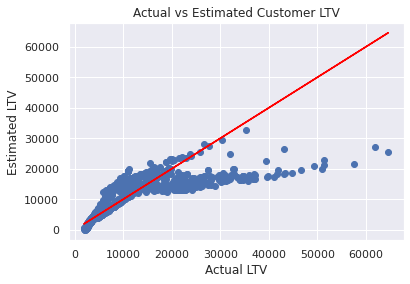

In [93]:
# Model graph to see predictions


X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV", )
plt.title("Actual vs Estimated Customer LTV")
plt.show()

In [94]:
#lets see their errors

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2118.645099668081
Mean Sq. Error (MSE)          : 17339210.020718113
Root Mean Sq. Error (RMSE)     : 4164.037706447687
Mean Abs. Perc. Error (MAPE) : 24.11678778826261


In [95]:
clv_score = []

clv_score.append((results.rsquared,
                  mean_absolute_error(y_test, y_pred),
                 mse(y_test, y_pred),rmse(y_test, y_pred),
                 np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
clv_score

[(0.6388768980461503,
  2118.645099668081,
  17339210.020718113,
  4164.037706447687,
  24.11678778826261)]

# Model 2

In [96]:
#duplicate the original data and get the log version of it to be able to reach higher R2(with outliers)
df2 = df_clv.copy()

df2['Monthly Premium Auto'] = np.log(df['Monthly Premium Auto'])
df2['Total Claim Amount'] = np.log(df['Total Claim Amount'])
y = np.log(df2['Customer Lifetime Value'])

import statsmodels.api as sm


X2 =  df2.drop('Customer Lifetime Value',axis=1)

In [97]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X2_train.shape[0]))
print('Test Data Count: {}'.format(X2_test.shape[0]))

X2_train = sm.add_constant(X2_train)
results_log = sm.OLS(y_train, X2_train).fit()
results_log.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.903
Method:                      Least Squares   F-statistic:                     2485.
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:25:54   Log-Likelihood:                 1108.7
No. Observations:                     6393   AIC:                            -2167.
Df Residuals:                         6368   BIC:                            -1998.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6559      0.041     89.893      0.000       3.576       3.736
Income                          1.296e-07   1.48e-07      0.876      0.381    -1.6e-07     4.2e-07
Monthly Premium Auto               0.9849      0.009    108.104      0.000       0.967       1.003
Months Since Last Claim            0.0007      0.000      2.801      0.005       0.000       0.001
Months Since Policy Inception     -0.0001   9.15e-05     -1.631      0.103      -0.000    3.01e-05
Number of Open Complaints         -0.0189      0.003     -6.733      0.000      -0.024      -0.013
Total Claim Amount                 0.0021      0.003      0.615      0.538      -0.004       0.009
Marital Status_Married             0.0032      0.007      0.427      0.670      -0.011       0.018
Marital Status_Single             -0.0353      0.009     -4.106      0.000      -0.052      -0.018
Number of Policies_2               1.3993      0.007    210.090      0.000       1.386       1.412
Number of Policies_3               0.6928      0.008     84.672      0.000       0.677       0.709
Number of Policies_4               0.6936      0.013     54.475      0.000       0.669       0.719
Number of Policies_5               0.6908      0.013     53.869      0.000       0.666       0.716
Number of Policies_6               0.6949      0.013     51.504      0.000       0.668       0.721
Number of Policies_7               0.6886      0.013     53.310      0.000       0.663       0.714
Number of Policies_8               0.6934      0.013     52.646      0.000       0.668       0.719
Number of Policies_9               0.6929      0.013     54.202      0.000       0.668       0.718
Education_College                 -0.0032      0.007     -0.478      0.633      -0.016       0.010
Education_Doctor                   0.0209      0.014      1.488      0.137      -0.007       0.049
Education_High School or Below     0.0122      0.007      1.820      0.069      -0.001       0.025
Education_Master                   0.0299      0.010      2.948      0.003       0.010       0.050
EmploymentStatus_Employed          0.0735      0.013      5.446      0.000       0.047       0.100
EmploymentStatus_Medical Leave     0.0261      0.017      1.565      0.118      -0.007       0.059
EmploymentStatus_Retired          -0.0027      0.019     -0.142      0.887      -0.040       0.034
EmploymentStatus_Unemployed       -0.0164      0.014     -1.205      0.228      -0.043       0.010
==============================================================================
Omnibus:                     2216.000   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9659.994
Skew:              

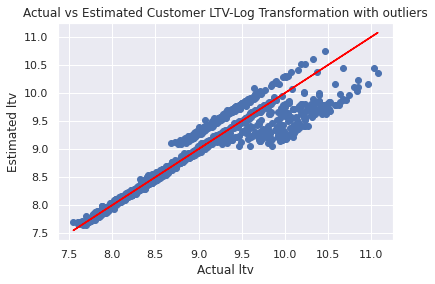

In [98]:
# Model graph to see predictions


X2_test = sm.add_constant(X2_test)

y_pred = results_log.predict(X2_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Log Transformation with outliers")
plt.show()

In [99]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.1054204643564149
Mean Sq. Error (MSE)          : 0.042962065305014924
Root Mean Sq. Error (RMSE)     : 0.2072729246790688
Mean Abs. Perc. Error (MAPE) : 1.1131046325131615


In [100]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

In [101]:
exp_ypred

6217    8517.55
7669    5233.91
2685    8354.14
7457   10657.33
3841    8353.90
         ...   
5612   11364.45
1022    3726.64
8951    8995.76
5004    5471.63
336    10854.12
Length: 2741, dtype: float64

In [102]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(exp_ytest, exp_ypred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(exp_ytest, exp_ypred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(exp_ytest, exp_ypred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))


Mean Absolute Error (MAE)        : 1544.416619609418
Mean Sq. Error (MSE)          : 15384158.118966062
Root Mean Sq. Error (RMSE)     : 3922.2644121688254
Mean Abs. Perc. Error (MAPE) : 10.140395739203809


In [103]:
clv_score.append((results.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))
clv_score

[(0.6388768980461503,
  2118.645099668081,
  17339210.020718113,
  4164.037706447687,
  24.11678778826261),
 (0.6388768980461503,
  1544.416619609418,
  15384158.118966062,
  3922.2644121688254,
  10.140395739203809)]

# Model 3

In [104]:
#duplicate the original data and winsorize the data at %5
df3 = df_clv.copy()

df3['Monthly Premium Auto'] = winsorize(df3['Monthly Premium Auto'],(0, 0.05))
df3['Total Claim Amount'] = winsorize(df3['Total Claim Amount'],(0, 0.05))


y = df3['Customer Lifetime Value']
X3 =  df3.drop('Customer Lifetime Value',axis=1)

In [105]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X3_train.shape[0]))
print('Test Data Count: {}'.format(X3_test.shape[0]))


X3_train = sm.add_constant(X3_train)
results_wins = sm.OLS(y_train, X3_train).fit()
results_wins.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.628
Model:                                 OLS   Adj. R-squared:                  0.626
Method:                      Least Squares   F-statistic:                     447.1
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:25:58   Log-Likelihood:                -62426.
No. Observations:                     6393   AIC:                         1.249e+05
Df Residuals:                         6368   BIC:                         1.251e+05
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5897.8233    370.015    -15.939      0.000   -6623.177   -5172.469
Income                            -0.0018      0.003     -0.589      0.556      -0.008       0.004
Monthly Premium Auto              95.5297      2.470     38.680      0.000      90.688     100.371
Months Since Last Claim           13.4454      5.230      2.571      0.010       3.193      23.698
Months Since Policy Inception      0.4268      1.895      0.225      0.822      -3.288       4.142
Number of Open Complaints       -123.3277     58.140     -2.121      0.034    -237.302      -9.354
Total Claim Amount                 0.5292      0.315      1.682      0.093      -0.087       1.146
Marital Status_Married          -113.0746    153.391     -0.737      0.461    -413.772     187.623
Marital Status_Single           -345.0125    178.699     -1.931      0.054    -695.322       5.297
Number of Policies_2            1.214e+04    137.908     87.996      0.000    1.19e+04    1.24e+04
Number of Policies_3            3512.0779    169.411     20.731      0.000    3179.975    3844.181
Number of Policies_4            3537.0549    263.630     13.417      0.000    3020.251    4053.858
Number of Policies_5            3570.0332    265.536     13.445      0.000    3049.493    4090.574
Number of Policies_6            3539.5004    279.340     12.671      0.000    2991.900    4087.101
Number of Policies_7            3616.4937    267.418     13.524      0.000    3092.264    4140.723
Number of Policies_8            3501.7776    272.716     12.840      0.000    2967.162    4036.393
Number of Policies_9            3537.4811    264.695     13.364      0.000    3018.590    4056.372
Education_College               -117.4437    137.091     -0.857      0.392    -386.188     151.301
Education_Doctor                 247.4574    291.367      0.849      0.396    -323.721     818.635
Education_High School or Below   144.8087    138.565      1.045      0.296    -126.825     416.442
Education_Master                 296.2651    210.407      1.408      0.159    -116.203     708.734
EmploymentStatus_Employed        910.5204    279.538      3.257      0.001     362.532    1458.509
EmploymentStatus_Medical Leave   442.9474    345.246      1.283      0.200    -233.852    1119.746
EmploymentStatus_Retired         -17.2487    390.716     -0.044      0.965    -783.183     748.685
EmploymentStatus_Unemployed     -116.7310    281.186     -0.415      0.678    -667.951     434.489
==============================================================================
Omnibus:                     5336.144   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237622.422
Skew:              

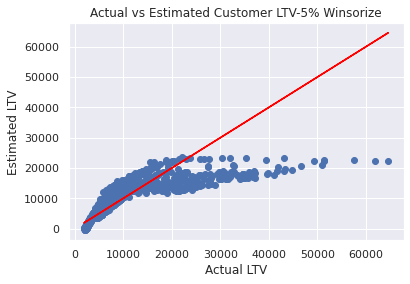

In [106]:
# Model graph to see predictions


X3_test = sm.add_constant(X3_test)

y_pred = results_wins.predict(X3_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV", )
plt.title("Actual vs Estimated Customer LTV-5% Winsorize")
plt.show()

In [107]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2283.372665336289
Mean Sq. Error (MSE)          : 17418677.453130677
Root Mean Sq. Error (RMSE)     : 4173.568910792139
Mean Abs. Perc. Error (MAPE) : 27.57607081478799


In [108]:
clv_score.append((results_wins.rsquared,
                  mean_absolute_error(y_test, y_pred),
                 mse(y_test, y_pred),rmse(y_test, y_pred),
                 np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
clv_score

[(0.6388768980461503,
  2118.645099668081,
  17339210.020718113,
  4164.037706447687,
  24.11678778826261),
 (0.6388768980461503,
  1544.416619609418,
  15384158.118966062,
  3922.2644121688254,
  10.140395739203809),
 (0.6275527712096541,
  2283.372665336289,
  17418677.453130677,
  4173.568910792139,
  27.57607081478799)]

# Model 4

In [109]:
#duplicate the original data and take log of the data without outlier

df4 = df3.copy()


df4['Monthly Premium Auto'] = np.log(df4['Monthly Premium Auto'])
df4['Total Claim Amount'] = np.log(df4['Total Claim Amount'])


y = np.log(df4['Customer Lifetime Value'])
X4 =df4.drop('Customer Lifetime Value',axis=1)

In [110]:
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X4_train.shape[0]))
print('Test Data Count: {}'.format(X4_test.shape[0]))


X4_train = sm.add_constant(X4_train)
results_logwins = sm.OLS(y_train, X4_train).fit()
results_logwins.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.898
Model:                                 OLS   Adj. R-squared:                  0.898
Method:                      Least Squares   F-statistic:                     2333.
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:26:00   Log-Likelihood:                 927.69
No. Observations:                     6393   AIC:                            -1805.
Df Residuals:                         6368   BIC:                            -1636.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.2942      0.045     72.829      0.000       3.206       3.383
Income                          8.808e-08   1.52e-07      0.579      0.563    -2.1e-07    3.86e-07
Monthly Premium Auto               1.0631      0.010    104.839      0.000       1.043       1.083
Months Since Last Claim            0.0008      0.000      3.026      0.002       0.000       0.001
Months Since Policy Inception     -0.0001   9.41e-05     -1.163      0.245      -0.000    7.51e-05
Number of Open Complaints         -0.0191      0.003     -6.614      0.000      -0.025      -0.013
Total Claim Amount                 0.0054      0.003      1.573      0.116      -0.001       0.012
Marital Status_Married             0.0042      0.008      0.553      0.580      -0.011       0.019
Marital Status_Single             -0.0318      0.009     -3.599      0.000      -0.049      -0.014
Number of Policies_2               1.3981      0.007    204.055      0.000       1.385       1.412
Number of Policies_3               0.6886      0.008     81.810      0.000       0.672       0.705
Number of Policies_4               0.6905      0.013     52.716      0.000       0.665       0.716
Number of Policies_5               0.6920      0.013     52.455      0.000       0.666       0.718
Number of Policies_6               0.6918      0.014     49.838      0.000       0.665       0.719
Number of Policies_7               0.6945      0.013     52.266      0.000       0.668       0.721
Number of Policies_8               0.6919      0.014     51.067      0.000       0.665       0.718
Number of Policies_9               0.6907      0.013     52.520      0.000       0.665       0.716
Education_College                 -0.0035      0.007     -0.515      0.606      -0.017       0.010
Education_Doctor                   0.0204      0.014      1.406      0.160      -0.008       0.049
Education_High School or Below     0.0119      0.007      1.735      0.083      -0.002       0.025
Education_Master                   0.0307      0.010      2.943      0.003       0.010       0.051
EmploymentStatus_Employed          0.0774      0.014      5.574      0.000       0.050       0.105
EmploymentStatus_Medical Leave     0.0223      0.017      1.297      0.195      -0.011       0.056
EmploymentStatus_Retired          -0.0002      0.019     -0.009      0.993      -0.038       0.038
EmploymentStatus_Unemployed       -0.0215      0.014     -1.537      0.124      -0.049       0.006
==============================================================================
Omnibus:                     2077.394   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8160.440
Skew:              

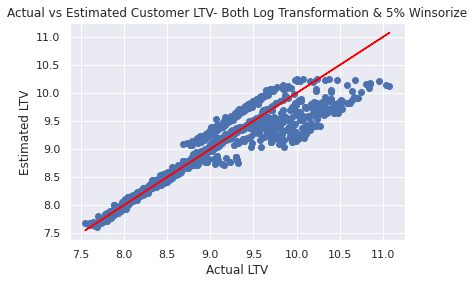

In [111]:
# Model graph to see predictions


X4_test = sm.add_constant(X4_test)

y_pred = results_logwins.predict(X4_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV", )
plt.title("Actual vs Estimated Customer LTV- Both Log Transformation & 5% Winsorize")
plt.show()

In [112]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.11608304470954162
Mean Sq. Error (MSE)          : 0.04535441044588914
Root Mean Sq. Error (RMSE)     : 0.21296574946664346
Mean Abs. Perc. Error (MAPE) : 1.2308677829703552


In [113]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

clv_score.append((results_logwins.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))
clv_score

[(0.6388768980461503,
  2118.645099668081,
  17339210.020718113,
  4164.037706447687,
  24.11678778826261),
 (0.6388768980461503,
  1544.416619609418,
  15384158.118966062,
  3922.2644121688254,
  10.140395739203809),
 (0.6275527712096541,
  2283.372665336289,
  17418677.453130677,
  4173.568910792139,
  27.57607081478799),
 (0.8979026686051423,
  1641.632739057297,
  15678528.855843563,
  3959.6122102856943,
  11.17581467674252)]

# Model 5

In [114]:
#the best model is the one with log transformation and outliers included

#Let's use polynomial features to see if we can do better


from sklearn.preprocessing import PolynomialFeatures


y = np.log(df2['Customer Lifetime Value'])
X5 =df2.drop('Customer Lifetime Value',axis=1)


pol = PolynomialFeatures()


array = pol.fit_transform(X5)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(X5.columns)
df_pol

,1,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,...,EmploymentStatus_Employed^2,EmploymentStatus_Employed EmploymentStatus_Medical Leave,EmploymentStatus_Employed EmploymentStatus_Retired,EmploymentStatus_Employed EmploymentStatus_Unemployed,EmploymentStatus_Medical Leave^2,EmploymentStatus_Medical Leave EmploymentStatus_Retired,EmploymentStatus_Medical Leave EmploymentStatus_Unemployed,EmploymentStatus_Retired^2,EmploymentStatus_Retired EmploymentStatus_Unemployed,EmploymentStatus_Unemployed^2
0,1.00,56274.00,4.23,32.00,5.00,0.00,5.95,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,4.54,13.00,42.00,0.00,7.03,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,1.00,48767.00,4.68,18.00,38.00,0.00,6.34,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,4.66,18.00,65.00,0.00,6.27,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,1.00,43836.00,4.29,12.00,44.00,0.00,4.93,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.00,71941.00,4.29,18.00,89.00,0.00,5.29,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9130,1.00,21604.00,4.37,14.00,28.00,0.00,5.94,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9131,1.00,0.00,4.44,9.00,37.00,3.00,6.67,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9132,1.00,21941.00,4.56,34.00,3.00,0.00,6.54,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [115]:
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(df_pol_train.shape[0]))
print('Test Data Count: {}'.format(df_pol_test.shape[0]))

df_pol_train = sm.add_constant(df_pol_train)
results_pol = sm.OLS(y_train, df_pol_train).fit()
results_pol.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.908
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     229.6
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:26:03   Log-Likelihood:                 1267.6
No. Observations:                     6393   AIC:                            -2005.
Df Residuals:                         6128   BIC:                            -213.0
Df Model:                              264                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.1066      0.510      6.094      0.000       2.107       4.106
Income                                                         3.223e-06   3.36e-06      0.959      0.338   -3.37e-06    9.82e-06
Monthly Premium Auto                                              1.2094      0.209      5.780      0.000       0.799       1.620
Months Since Last Claim                                          -0.0060      0.004     -1.433      0.152      -0.014       0.002
Months Since Policy Inception                                    -0.0001      0.002     -0.069      0.945      -0.003       0.003
Number of Open Complaints                                        -0.0616      0.051     -1.211      0.226      -0.161       0.038
Total Claim Amount                                               -0.0506      0.059     -0.850      0.395      -0.167       0.066
Marital Status_Married                                            0.0751      0.061      1.231      0.218      -0.045       0.195
Marital Status_Single                                             0.0368      0.073      0.505      0.614      -0.106       0.180
Number of Policies_2                                              0.7495      0.053     14.171      0.000       0.646       0.853
Number of Policies_3                                              0.3435      0.068      5.052      0.000       0.210       0.477
Number of Policies_4                                              0.3262      0.112      2.909      0.004       0.106       0.546
Number of Policies_5                                              0.3420      0.105      3.251      0.001       0.136       0.548
Number of Policies_6                                              0.3243      0.115      2.808      0.005       0.098       0.551
Number of Policies_7                                              0.3487      0.120      2.893      0.004       0.112       0.585
Number of Policies_8                                              0.3218      0.121      2.670      0.008       0.086       0.558
Number of Policies_9                                              0.3696      0.108      3.415      0.001       0.157       0.582
Education_College                                                 0.0182      0.054      0.334      0.738      -0.088       0.125
Education_Doctor                                                 -0.0479      0.120     -0.400      0.689      -0.282       0.187
Education_High School or Below                                    0.0337      0.055      0.617      0.537      -0.073       0.141
Education_Master                      

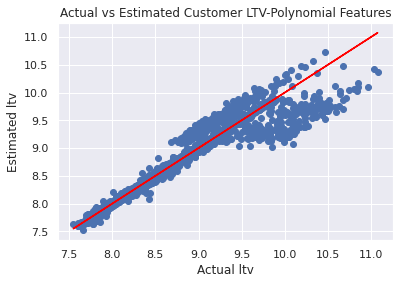

In [116]:
df_pol_test = sm.add_constant(df_pol_test)

y_pred = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

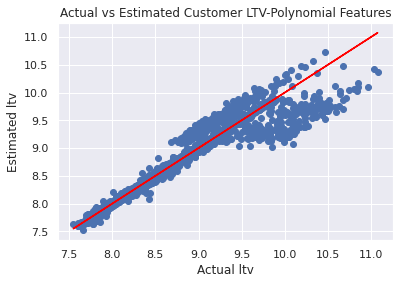

In [117]:
df_pol_test = sm.add_constant(df_pol_test)

y_pred = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [118]:
print("Mean Absolute Error (MAE)     : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)    : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE)  : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)     : 0.11042262444678858
Mean Sq. Error (MSE)          : 0.04375512727287373
Root Mean Sq. Error (RMSE)    : 0.2091772628008927
Mean Abs. Perc. Error (MAPE)  : 1.173658200194484


In [119]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

clv_score.append((results_pol.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))

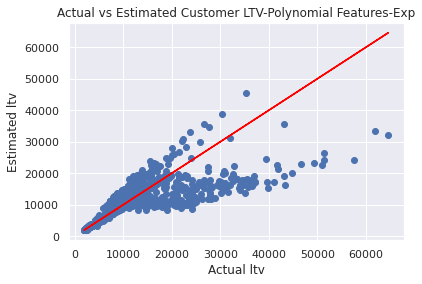

In [120]:
# Model graph to see exponential version of predictions


df_pol_test = sm.add_constant(df_pol_test)

y_pred = np.exp(results_pol.predict(df_pol_test))
sns.set(color_codes=True)
plt.scatter(exp_ytest, y_pred)
plt.plot(exp_ytest, exp_ytest, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features-Exp")
plt.show()

Actual scores and predicted scores have good linearity but after some point we see that linearity is not good enough. In the graph, it is seen that customer life time value prediction is better with the values lower than 10.000.Lets check if there is any improvement on mean sq error term when we predict customer LTV lower than 10.000.

In [121]:
mse( y_test[y_test<10],y_pred[y_test<10])

70129552.10322975

# Model 6

We see some improvements when we get polynomial feautures into the scene. However, there are some insignificant features in the model that p-values are more than 0.05. Thats why we will build a new model by removing insignificant features towards target variable.

In [122]:
    significant_features = list(results_pol.pvalues[results_pol.pvalues <= 0.05].index)

In [123]:
df_sig_train, df_sig_test, y_train, y_test = train_test_split(df_pol[significant_features], y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(df_sig_train.shape[0]))
print('Test Data Count: {}'.format(df_sig_test.shape[0]))

df_sig_train = sm.add_constant(df_sig_train)
results_sig = sm.OLS(y_train, df_sig_train).fit()
results_sig.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     1581.
Date:                     Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:26:09   Log-Likelihood:                 1136.7
No. Observations:                     6393   AIC:                            -2195.
Df Residuals:                         6354   BIC:                            -1932.
Df Model:                               38                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.6736      0.039     95.031      0.000       3.598       3.749
Monthly Premium Auto                                              0.9952      0.009    114.512      0.000       0.978       1.012
Number of Policies_2                                              0.6776      0.013     51.138      0.000       0.652       0.704
Number of Policies_3                                              0.3457      0.004     84.687      0.000       0.338       0.354
Number of Policies_4                                              0.3485      0.006     54.698      0.000       0.336       0.361
Number of Policies_5                                              0.3444      0.006     53.877      0.000       0.332       0.357
Number of Policies_6                                              0.3454      0.007     51.343      0.000       0.332       0.359
Number of Policies_7                                              0.3455      0.006     53.680      0.000       0.333       0.358
Number of Policies_8                                              0.3469      0.007     52.863      0.000       0.334       0.360
Number of Policies_9                                              0.3478      0.006     54.517      0.000       0.335       0.360
EmploymentStatus_Medical Leave                                    0.2525      0.101      2.491      0.013       0.054       0.451
Income Months Since Last Claim                                 2.513e-08   6.51e-09      3.857      0.000    1.24e-08    3.79e-08
Income Number of Policies_2                                   -1.002e-06   3.08e-07     -3.252      0.001   -1.61e-06   -3.98e-07
Income EmploymentStatus_Unemployed                             9.856e-14   5.09e-14      1.937      0.053   -1.19e-15    1.98e-13
Monthly Premium Auto EmploymentStatus_Medical Leave              -0.1002      0.045     -2.222      0.026      -0.189      -0.012
Monthly Premium Auto EmploymentStatus_Unemployed                 -0.0427      0.014     -3.103      0.002      -0.070      -0.016
Months Since Last Claim^2                                     -4.301e-06   1.21e-05     -0.355      0.723   -2.81e-05    1.95e-05
Months Since Last Claim Marital Status_Married                   -0.0009      0.000     -1.919      0.055      -0.002    2.01e-05
Months Since Last Claim Number of Policies_2                      0.0026      0.001      4.367      0.000       0.001       0.004
Months Since Policy Inception Marital Status_Married          -4.458e-05      0.000     -0.349      0.727      -0.000       0.000
Months Since Policy Inception Number o

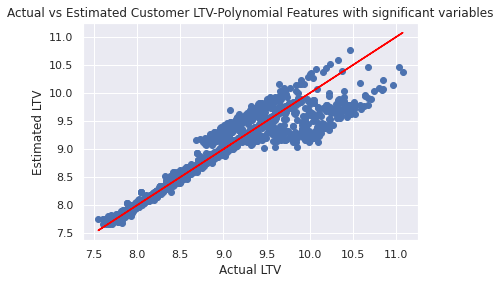

In [124]:
# Model graph to see predictions


df_sig_test = sm.add_constant(df_sig_test)

y_pred = results_sig.predict(df_sig_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV" )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features with significant variables")
plt.show()

In [125]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.11025343628969371
Mean Sq. Error (MSE)          : 0.04436955920239074
Root Mean Sq. Error (RMSE)     : 0.21064082985592023
Mean Abs. Perc. Error (MAPE) : 1.1696187299282523


In [126]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

clv_score.append((results_sig.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))

In [127]:
df_clvscore = pd.DataFrame(clv_score)
df_clvscore

,0,1,2,3,4
0,0.64,2118.65,17339210.02,4164.04,24.12
1,0.64,1544.42,15384158.12,3922.26,10.14
2,0.63,2283.37,17418677.45,4173.57,27.58
3,0.90,1641.63,15678528.86,3959.61,11.18
4,0.91,1562.20,15467204.65,3932.84,10.65
5,0.90,1575.20,15579062.34,3947.03,10.64


In [128]:
df_clvscore.index = ['Standard','Log with outliers','Without Outliers','Log without outliers',
                       'Polynomial Features',
                       'Polynomial with significant features']

df_clvscore.columns = ['R2', 'MAE', 'MSE','RMSE','MAPE']


df_clvscore

,R2,MAE,MSE,RMSE,MAPE
Standard,0.64,2118.65,17339210.02,4164.04,24.12
Log with outliers,0.64,1544.42,15384158.12,3922.26,10.14
Without Outliers,0.63,2283.37,17418677.45,4173.57,27.58
Log without outliers,0.90,1641.63,15678528.86,3959.61,11.18
Polynomial Features,0.91,1562.20,15467204.65,3932.84,10.65
Polynomial with significant features,0.90,1575.20,15579062.34,3947.03,10.64


# Comparison
### Similarities: Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.
### Differences: Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.

In [129]:
lrm = LinearRegression()
lrm.fit(df_pol_train, y_train)

y_train_predict = lrm.predict(df_pol_train)
y_test_predict = lrm.predict(df_pol_test)

print("Train observation number  : {}".format(df_pol_train.shape[0]))
print("Test observation number   : {}".format(df_pol_test.shape[0]), "\n")

print("Train R-Square  : {}".format(lrm.score(df_pol_train, y_train)))
print("-----Test Scores---")
print("Test R-Square   : {}".format(lrm.score(df_pol_test, y_test)))
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean squared error (MSE)              : {}".format(mse(y_test, y_test_predict)))
print("Root mean squared error(RMSE)         : {}".format(rmse(y_test, y_test_predict)))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

Train observation number  : 6393
Test observation number   : 2741 

Train R-Square  : 0.9082023042620071
-----Test Scores---
Test R-Square   : 0.8957578470155266
Mean_absolute_error (MAE)             : 0.11042260880591201
Mean squared error (MSE)              : 0.04375512720220308
Root mean squared error(RMSE)         : 0.20917726263196743
Mean absolute percentage error (MAPE) : 1.1736580237441852


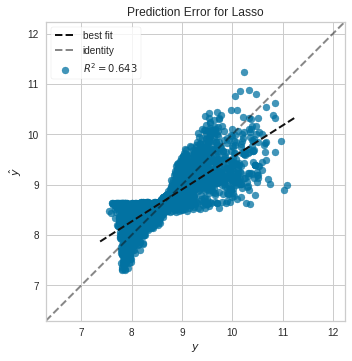

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Create the train and test data
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.30, random_state = 450)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

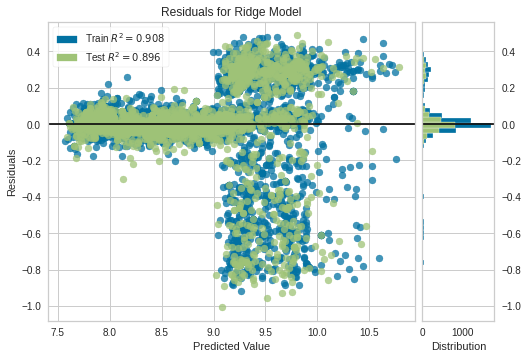

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
Model = Ridge()
visualizer_residual = ResidualsPlot(Model)

visualizer_residual.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer_residual.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer_residual.show()                 # Finaliz

Conclusion
We have created six different models to reach the best model with highest R-square and lower error terms.

In the light of comparison table, we could choose to go for the 5th model which have both log transformation and polynomial features. We see that R square is 0.91 means that 91% of the variance can be explained, which is really high.

It seems like I predict values really good! Actual scores and predicted scores have good linearity but after some point we see that linearity is not good enough. In the graph, it is seen that customer life time value prediction is better with the values lower than 10.000. If we predict customer LTV lower than 10.000, we see that Mean Sq. Error decreased from 0.04 to 0.02 which is almost half of the initial error.

We do not see overfitting problem with the model but still I have checked Lasso and Ridge models to see if there is any change on the model.

From marketing perspective, we have a better opinion which customer have higher predicted life time value. With that information it is easier to lead marketing activities into more profitable scale.